## 0.1 Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
#Creating a folder path

path = r'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

In [4]:
path

'/Users/Ben/Documents/Danni/Data Analytics D 2023/Achievement 6/'

## 0.2 Importing Data

In [5]:
df = pd.read_csv(os.path.join(path, 'Prepared Data/All_years_happiness.csv'))

## 0.3 Data Cleaning & Checks

In [6]:
df.columns

Index(['Country', 'Years', 'Year country combined', 'Happiness Rank',
       'Happiness Score', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity'],
      dtype='object')

In [7]:
df.head()

,Country,Years,Year country combined,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity
0,Switzerland,2015,"Switzerland, 2015",1,7.587,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678
1,Iceland,2015,"Iceland, 2015",2,7.561,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630
2,Denmark,2015,"Denmark, 2015",3,7.527,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139
3,Norway,2015,"Norway, 2015",4,7.522,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699
4,Canada,2015,"Canada, 2015",5,7.427,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811


In [9]:
df.shape

(782, 11)

In [10]:
df.dtypes

Country                           object
Years                              int64
Year country combined             object
Happiness Rank                     int64
Happiness Score                  float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
dtype: object

In [12]:
#Convert years into datetime64
df ['Years'] = df ['Years'].astype('datetime64[ns]')

In [13]:
df.dtypes

Country                                  object
Years                            datetime64[ns]
Year country combined                    object
Happiness Rank                            int64
Happiness Score                         float64
Economy (GDP per Capita)                float64
Family                                  float64
Health (Life Expectancy)                float64
Freedom                                 float64
Trust (Government Corruption)           float64
Generosity                              float64
dtype: object

In [14]:
#Check for missing values 

df.isnull().sum()

Country                          0
Years                            0
Year country combined            0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [15]:
#Check for duplicates
dups = df.duplicated()

In [16]:
dups

0      False
1      False
2      False
3      False
4      False
       ...  
777    False
778    False
779    False
780    False
781    False
Length: 782, dtype: bool

/tmp/ipykernel_14875/522111639.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values
/Users/Ben/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Happiness Score', ylabel='Density'>

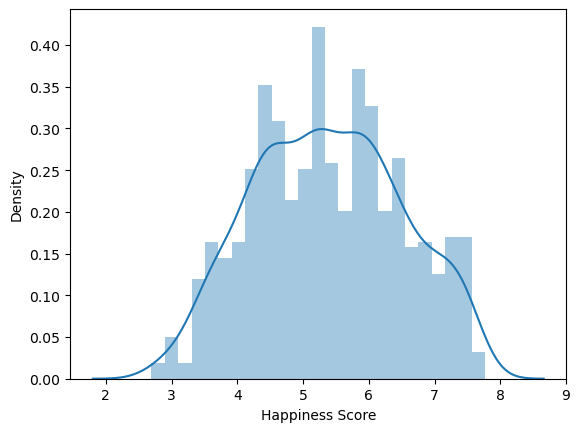

In [17]:
sns.distplot(df['Happiness Score'], bins=25) # Shows extreme values

In [18]:
df['Happiness Score'].mean()

5.379017902998722

In [19]:
df['Happiness Score'].median()

5.322

In [20]:
df['Happiness Score'].max()

7.769

In [21]:
df['Happiness Score'].min()

2.693000078

In [22]:
#Calculate Quartile ranges for outliers
Q1 = df['Happiness Score'].quantile(0.25)
Q3 = df['Happiness Score'].quantile(0.75)


In [24]:
IQR = Q3 - Q1

In [25]:
# Define upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [26]:
# Filter outliers
outliers = df[(df['Happiness Score'] < lower_bound) | (df['Happiness Score'] > upper_bound)]

print("Lower Bound for Outliers:", lower_bound)
print("Upper Bound for Outliers:", upper_bound)
print("Outliers:")
print(outliers)

Lower Bound for Outliers: 1.990125
Upper Bound for Outliers: 8.709125
Outliers:
Empty DataFrame
Columns: [Country, Years, Year country combined, Happiness Rank, Happiness Score, Economy (GDP per Capita), Family, Health (Life Expectancy), Freedom, Trust (Government Corruption), Generosity]
Index: []


#### Some of the outliers in the high values may need to be removed, but let's try without doing so first.

## 0.4 Scatter plot explorations

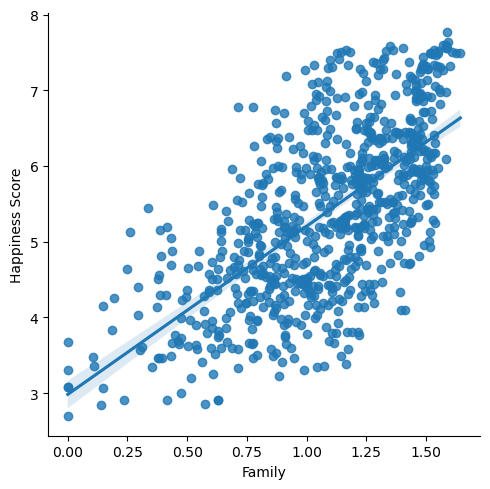

In [45]:
# Scatterplot of most correlated variables
# Family and happiness scatterplot
sns.lmplot(x = 'Family', y = 'Happiness Score', data = df)

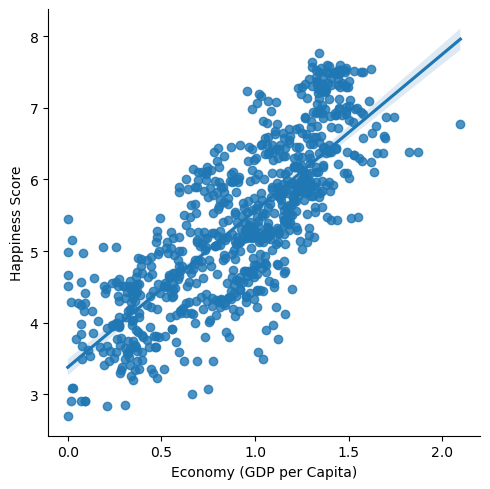

In [47]:
# Scatterplot of most correlated variables
# Economy and happiness scatterplot
sns.lmplot(x = 'Economy (GDP per Capita)', y = 'Happiness Score', data = df)

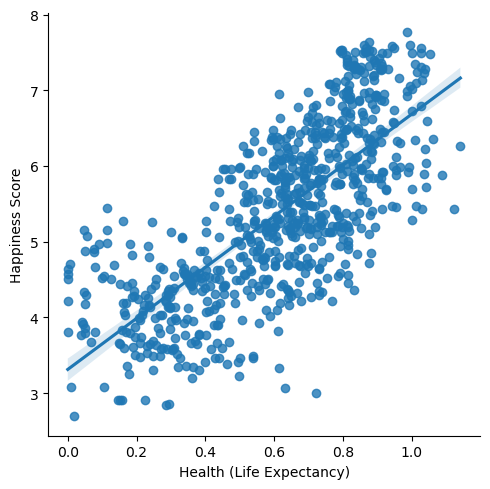

In [48]:
# Scatterplot of most correlated variables
# Health and happiness scatterplot
sns.lmplot(x = 'Health (Life Expectancy)', y = 'Happiness Score', data = df)

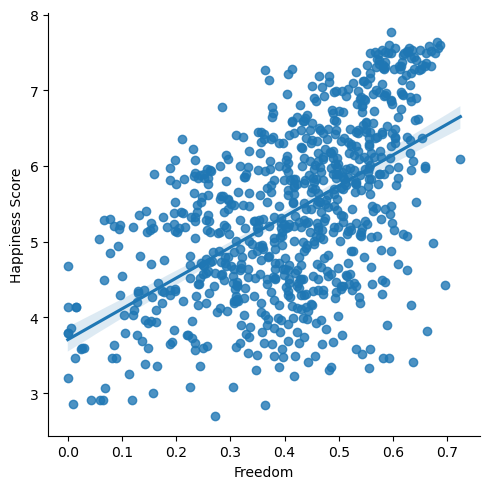

In [49]:
# Scatterplot of most correlated variables
# Freecom per capita and happiness scatterplot
sns.lmplot(x = 'Freedom', y = 'Happiness Score', data = df)

#### From previous explorations in 6.2, I know that Economy and Happiness Score are the most positively correlated variable, especially when I categorised Happiness Score. Therefore I would test the Hypothesis: The stronger the Economy (GDP per Captita), the higher the Happiness Score.

## 0.4 Data Prep for ML Regression

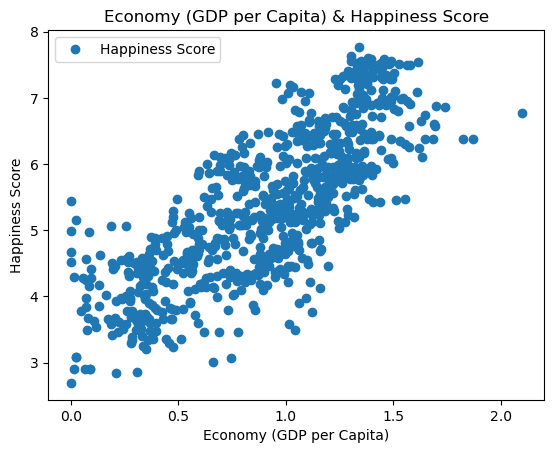

In [27]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other, in this case happiness score & Economy

df.plot(x = 'Economy (GDP per Capita)', y='Happiness Score',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Economy (GDP per Capita) & Happiness Score')  
plt.xlabel('Economy (GDP per Capita)')  
plt.ylabel('Happiness Score')  
plt.show()

In [29]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df['Economy (GDP per Capita)'].values.reshape(-1,1)
y = df['Happiness Score'].values.reshape(-1,1)

In [30]:
X

array([[1.39651   ],
       [1.30232   ],
       [1.32548   ],
       [1.459     ],
       [1.32629   ],
       [1.29025   ],
       [1.32944   ],
       [1.33171   ],
       [1.25018   ],
       [1.33358   ],
       [1.22857   ],
       [0.95578   ],
       [1.33723   ],
       [1.02054   ],
       [1.39451   ],
       [0.98124   ],
       [1.56391   ],
       [1.33596   ],
       [1.30782   ],
       [1.42727   ],
       [1.26637   ],
       [1.36011   ],
       [1.04424   ],
       [1.52186   ],
       [1.06353   ],
       [1.32792   ],
       [1.10715   ],
       [1.69042   ],
       [1.27778   ],
       [1.05351   ],
       [1.17898   ],
       [1.06166   ],
       [0.91861   ],
       [0.9669    ],
       [1.39541   ],
       [1.23011   ],
       [1.2074    ],
       [1.29098   ],
       [1.55422   ],
       [0.99534   ],
       [1.21183   ],
       [0.76454   ],
       [0.74553   ],
       [0.63244   ],
       [1.16891   ],
       [1.27074   ],
       [1.24461   ],
       [0.864

In [31]:
y

array([[7.587     ],
       [7.561     ],
       [7.527     ],
       [7.522     ],
       [7.427     ],
       [7.406     ],
       [7.378     ],
       [7.364     ],
       [7.286     ],
       [7.284     ],
       [7.278     ],
       [7.226     ],
       [7.2       ],
       [7.187     ],
       [7.119     ],
       [6.983     ],
       [6.946     ],
       [6.94      ],
       [6.937     ],
       [6.901     ],
       [6.867     ],
       [6.853     ],
       [6.81      ],
       [6.798     ],
       [6.786     ],
       [6.75      ],
       [6.67      ],
       [6.611     ],
       [6.575     ],
       [6.574     ],
       [6.505     ],
       [6.485     ],
       [6.477     ],
       [6.455     ],
       [6.411     ],
       [6.329     ],
       [6.302     ],
       [6.298     ],
       [6.295     ],
       [6.269     ],
       [6.168     ],
       [6.13      ],
       [6.123     ],
       [6.003     ],
       [5.995     ],
       [5.987     ],
       [5.984     ],
       [5.975

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [33]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [34]:
regression.fit(X_train, y_train)  # Fit the regression object onto the training set.

LinearRegression()

In [35]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

## 0.5 Regression Analysis

In [50]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [51]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [52]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.4688002885423664
R2 score:  0.6245244479747897


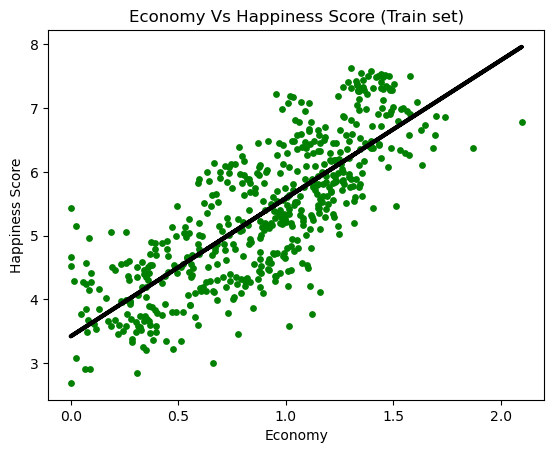

In [53]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='Black', linewidth =3)
plot_test.title('Economy Vs Happiness Score (Train set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

#### Overall, this plot provides a visual representation of how well the regression model performs on both the training and testing datasets. A lower MSE indicates better accuracy of the model's predictions. Here, the MSE is approximately 0.4688

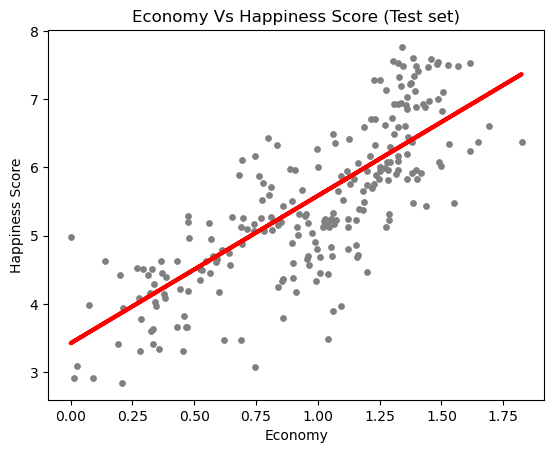

In [36]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Economy Vs Happiness Score (Test set)')
plot_test.xlabel('Economy')
plot_test.ylabel('Happiness Score')
plot_test.show()

In [37]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [38]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[2.16337475]]
Mean squared error:  0.503950724913581
R2 score:  0.6165274246795835


#### In summary, this prediction model has a positive slope indicating a positive relationship between the independent and dependent variables. The mean squared error indicates the average discrepancy between actual and predicted values. The R2 score of approximately 0.6165 suggests that about 61.65% of the variance in the happiness scores can be explained by the variation in the GDP per capita.

In [39]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,5.525,5.806091
1,6.886,6.446876
2,6.344,6.733791
3,7.119,6.439326
4,3.781,4.039473
5,4.692,5.925228
6,4.390,4.255378
7,5.061,5.024176
8,6.929,6.506131
9,5.488,5.989301


#### Conclusion on how well the model performed in the test set:
#### From reviewing the data, it's clear that the hypothesis relating to the Economy positively impacts the Happiness Score. Both the test and training model display a positive slope which supports our hypothesis. For example, the test set with the value of the slope, approximately 2.1634, indicates that for every one-unit increase in the GDP per capita, the predicted happiness score increases by approximately 2.1634 units.

#### Lastly, in regard to potential data bias from the models created, I didn't remove any extreme values as I didn't believe it as necessary in this case, therefore no bias could be formed. 